Exercise: Load a dataset (e.g., the Boston Housing dataset from Scikit-Learn) and prepare the data for linear regression (e.g., split into training and testing sets).

In [219]:
import pandas as pd
df= pd.read_csv('HousingData.csv')
# df

In [220]:
df.drop_duplicates(inplace=True)

In [221]:
df.dropna

<bound method DataFrame.dropna of         CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93   0.0  0.573  6.030   NaN  2.5050    1  273   

     PTRATIO       B  LSTAT  MEDV  
0       15.3  396.90   4.98  24.0  
1       17.8  396

In [222]:
import numpy as np
df.replace('-', np.nan, inplace=True)

In [223]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

In [224]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [225]:
from sklearn.model_selection import train_test_split
X = df.drop('MEDV', axis=1)
y= df['MEDV']
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=3)

Exercise: Implement linear regression using Scikit-Learn. Fit the model to the training data.

In [226]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Exercise: Predict the target variable for the test set using the fitted linear regression model.

In [227]:
y_pred = model.predict(X_test)

Exercise: Calculate the Mean Squared Error (MSE) of the linear regression model on the test set.

    Hint: Use `mean_squared_error` from `sklearn.metrics`.


In [228]:
from sklearn.metrics import mean_squared_error
mse= mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

Mean Squared Error: 18.87752321223317


Exercise: Calculate the R-squared value of the linear regression model on the test set.

In [229]:
from sklearn.metrics import r2_score
r2= r2_score(y_test, y_pred)
print("R-squared value of the linear regression model on the test set: ", r2)

R-squared value of the linear regression model on the test set:  0.7718860714191234


Exercise: Plot the regression line along with the actual data points to visually assess the model's performance.

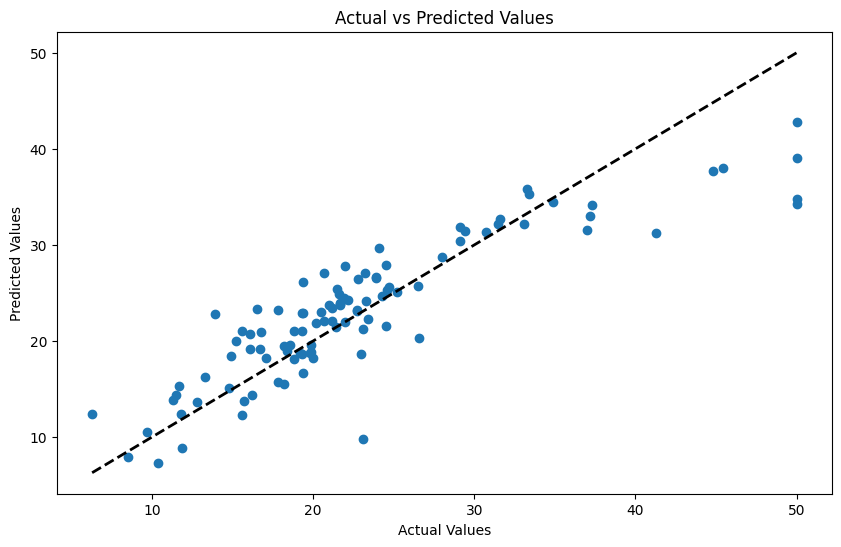

In [230]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle= '--',color='black',linewidth=2)

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.show()

Exercise: Evaluate the model's performance by comparing the predicted values with the actual values. Create a scatter plot of the predicted vs. actual values.

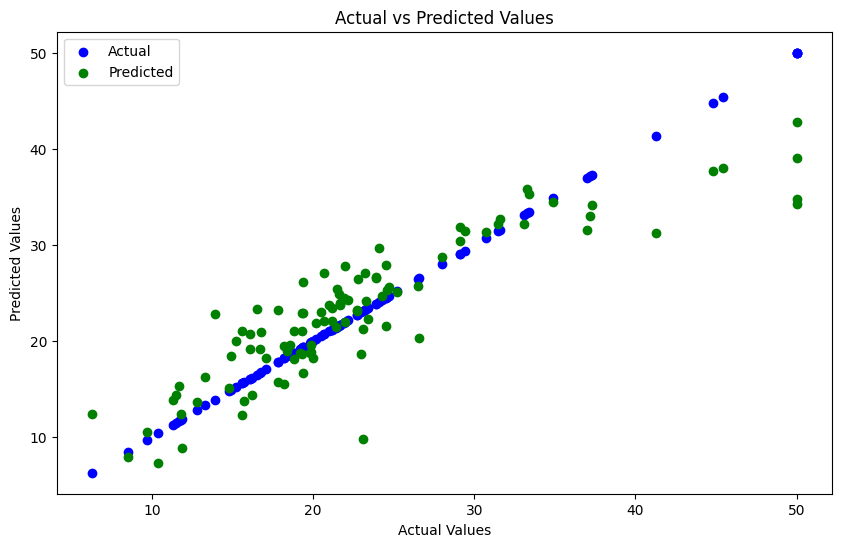

In [233]:



import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test, color='blue', label='Actual')
plt.scatter(y_test, y_pred, color='green', label='Predicted')


plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")

# Show legend
plt.legend()

plt.show()




Exercise: Interpret the coefficients of the linear regression model. Explain the impact of each feature on the target variable.

In [232]:

feature_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
coefficients = model.coef_
print("Coefficients:", coefficients)
for i, coeff in enumerate(coefficients):


 correlation_found = False
for i, coeff in enumerate(coefficients):
    feature_name = feature_names[i]

    if coeff > 0:
        print(f"There is a positive correlation between {feature_name} and house price.")
        correlation_found = True
    elif coeff < 0:
         print(f"There is a negative  correlation between {feature_name} and house price.")

         correlation_found = True


Coefficients: [-1.23268721e-01  4.10001063e-02 -1.20207669e-01  3.88952323e+00
 -1.45850020e+01  3.86231179e+00 -2.15704858e-02 -1.49021254e+00
  2.68592239e-01 -8.69350285e-03 -8.85239259e-01  1.02280165e-02
 -4.22936632e-01]
There is a negative  correlation between CRIM and house price.
There is a positive correlation between ZN and house price.
There is a negative  correlation between INDUS and house price.
There is a positive correlation between CHAS and house price.
There is a negative  correlation between NOX and house price.
There is a positive correlation between RM and house price.
There is a negative  correlation between AGE and house price.
There is a negative  correlation between DIS and house price.
There is a positive correlation between RAD and house price.
There is a negative  correlation between TAX and house price.
There is a negative  correlation between PTRATIO and house price.
There is a positive correlation between B and house price.
There is a negative  correlati